In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bitcoin = pd.read_csv("../upbit_data/train_data_2023.csv", index_col=0)

In [20]:
bitcoin.iloc[0]['mid_price']

21092500.0

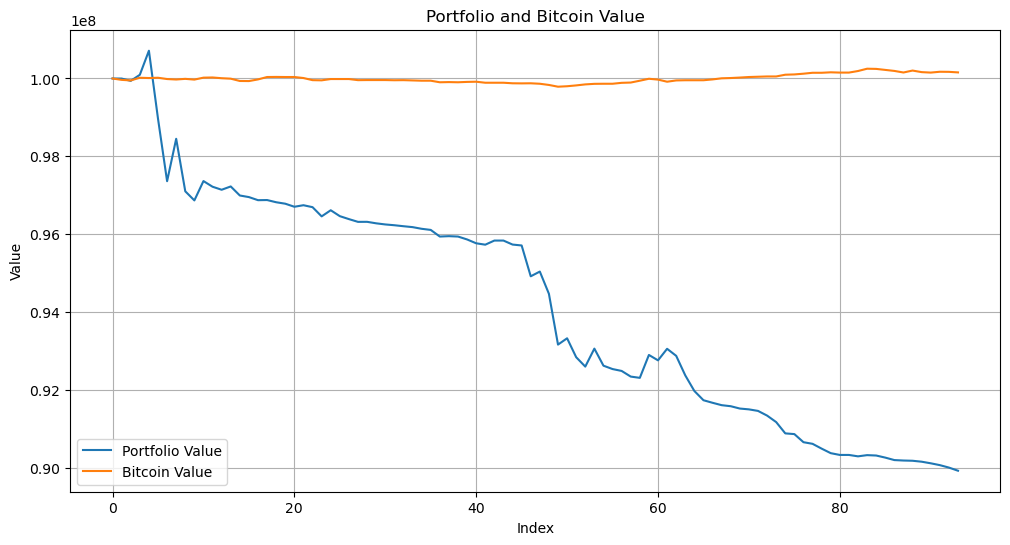

In [25]:
df = pd.read_csv("log_99.csv", index_col=0)

plt.figure(figsize=(12, 6))

# Plot the first graph (portfolio value)
df['value'].plot(label="Portfolio Value")
plt.xlabel("Min")
plt.ylabel("Value")

# Plot the second graph (Bitcoin value)
plt.plot(range(df.shape[0]), (bitcoin['mid_price'] / 21092500.0 * 1e8).iloc[:df.shape[0]], label="Bitcoin Value")
plt.xlabel("Index")
plt.ylabel("Value")

plt.title("Portfolio and Bitcoin Value")
plt.grid(True)

# Show a legend to differentiate the two lines
plt.legend()

# Show the combined plot
plt.show()


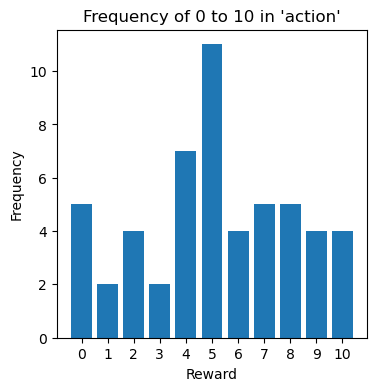

In [22]:
action_value_counts = df['action'].value_counts()

plt.figure(figsize=(4, 4))
plt.bar(action_value_counts.index, action_value_counts.values)
plt.title("Frequency of 0 to 10 in 'action'")
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.xticks(range(11))
plt.show()

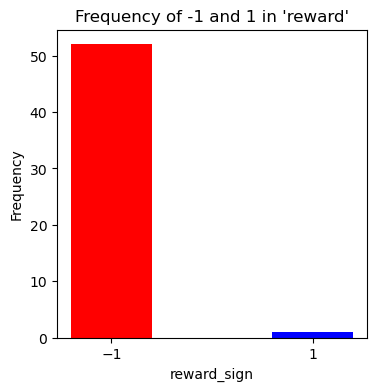

In [23]:
df['reward_sign'] = df['reward'].apply(lambda x: 1 if x > 0 else -1)

reward_value_counts = df['reward_sign'].value_counts()

plt.figure(figsize=(4, 4))
plt.bar(reward_value_counts.index, reward_value_counts.values, color=['red', 'blue'])
plt.title("Frequency of -1 and 1 in 'reward'")
plt.xlabel("reward_sign")
plt.ylabel("Frequency")
plt.xticks([-1, 1])
plt.show()

<Axes: >

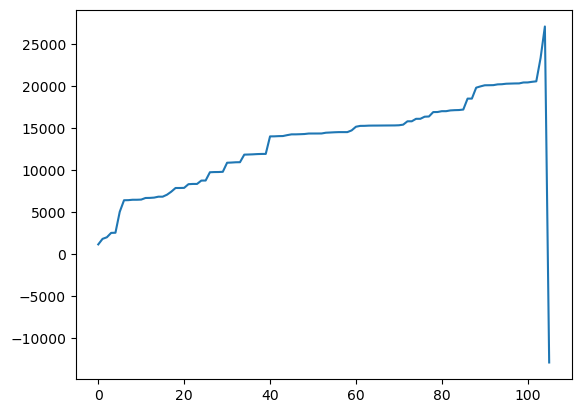

In [16]:
(df['reward']*0.0004*100000000).cumsum().plot()

In [ ]:
3